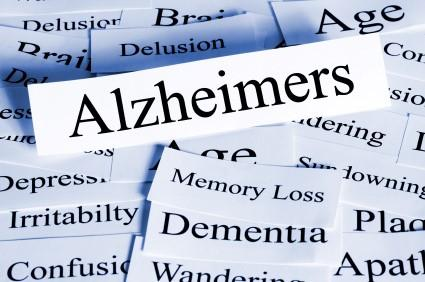

# Predicting Alzheimer's-related Dementia Using Machine Learning 

## 1. Background Information

### Alzheimer's disease and dementia
Alzheimer’s disease (AD) is a neurodegenerative disease with an unspecified cause and pathogenesis which primarily affects older people. One of the early symptoms of Alzheimer’s disease is dementia, a general term for memory loss and other cognitive dysfunctions serious enough to interfere with the patient's daily life. Alzheimer's disease accounts for 60-80% of dementia cases in the world. Alzheimer's has no cure, but one treatment — aducanumab (Aduhelm™) — is the first therapy to demonstrate that removing amyloid, one of the hallmarks of Alzheimer’s disease, from the brain is reasonably likely to reduce the cognitive and functional decline in people living with early Alzheimer’s. Other treatments can temporarily slow the worsening of dementia symptoms and improve the quality of life for those with Alzheimer's and their caregivers. Today, there is a worldwide effort underway to find better ways to treat the disease, delay its onset, and prevent it from developing. 

### Motivation & Goal
Given the fact that currently there is no cure for Alzheimer's disease, it is very critical to diagnose the disease at its early stage. A treatment performed at an early stage of the disease is more effective with fewer side effects than a treatment given at a later stage.

Machine learning (ML) has been used in biomedical research, and there is much interest in applying ML to help diagnose diseases like AD that affect a large population around the world. The goal of this project is to develop machine learning models that may help clinicians make accurate diagnoses of AD. Multiple ML model such as Naive Bayes, Logistic Regression, and Support Vector machine will be developed to determine the optimal analytic approach and identify the number of variables required. For each model, the performance is measured by parameters like accuracy, precision, recall, and F1-score. 

## 2. Understanding the data

### Dataset
The dataset is made available by the Open Access Series of Imaging Studies (`OASIS`), a project aimed at making MRI data sets of the brain freely available to the scientific community. By compiling and freely distributing MRI data sets, they hope to facilitate future discoveries in basic and clinical neuroscience. OASIS is supported by the Washington University Alzheimer’s Disease Research Center, Dr. Randy Buckner at the Howard Hughes Medical Institute (HHMI)( at Harvard University, the Neuroinformatics Research Group (NRG) at Washington University School of Medicine, and the Biomedical Informatics Research Network (BIRN). The dataset is available on [OASIS](https://www.oasis-brains.org/#data) as well as [Kaggle](https://www.kaggle.com). Specifically, `OASIS-2` (Longitudinal MRI Data in Nondemented and Demented Older Adults) is used for this work. 

OASIS-2 consists of a longitudinal collection of 150 subjects aged 60 to 96. Each subject was scanned on two or more visits, separated by at least one year for a total of 373 imaging sessions. For each subject, 3 or 4 individual T1-weighted MRI scans obtained in single scan sessions are included. The subjects are all right-handed and include both men and women. 72 of the subjects were characterized as nondemented throughout the study. 64 of the included subjects were characterized as demented at the time of their initial visits and remained so for subsequent scans, including 51 individuals with mild to moderate Alzheimer’s disease. Another 14 subjects were characterized as nondemented at the time of their initial visit and were subsequently characterized as demented at a later visit.

### Requred Libraries 

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from pathlib import Path
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import SGDClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, precision_score, accuracy_score, recall_score, roc_curve, auc, f1_score
from sklearn.svm import SVC
from sklearn.model_selection import cross_val_score, GridSearchCV
from sklearn.naive_bayes import GaussianNB

### Reading the longitudinal MRI dataset

In [2]:
# To avoid potential issues, the csv file was saved and read from local
df = pd.read_csv('oasis_longitudinal.csv')

In [3]:
# Let's have a quick glance at the dataset
df.head(7)

,Subject ID,MRI ID,Group,Visit,MR Delay,M/F,Hand,Age,EDUC,SES,MMSE,CDR,eTIV,nWBV,ASF
0,OAS2_0001,OAS2_0001_MR1,Nondemented,1,0,M,R,87,14,2.0,27.0,0.0,1987,0.696,0.883
1,OAS2_0001,OAS2_0001_MR2,Nondemented,2,457,M,R,88,14,2.0,30.0,0.0,2004,0.681,0.876
2,OAS2_0002,OAS2_0002_MR1,Demented,1,0,M,R,75,12,NaN,23.0,0.5,1678,0.736,1.046
3,OAS2_0002,OAS2_0002_MR2,Demented,2,560,M,R,76,12,NaN,28.0,0.5,1738,0.713,1.010
4,OAS2_0002,OAS2_0002_MR3,Demented,3,1895,M,R,80,12,NaN,22.0,0.5,1698,0.701,1.034
5,OAS2_0004,OAS2_0004_MR1,Nondemented,1,0,F,R,88,18,3.0,28.0,0.0,1215,0.710,1.444
6,OAS2_0004,OAS2_0004_MR2,Nondemented,2,538,F,R,90,18,3.0,27.0,0.0,1200,0.718,1.462


In [4]:
# Let's check the size of the dataset
df.size

5595

In [5]:
# Let's see the shpae of the dataset
df.shape

(373, 15)

In [6]:
# Let's check the size of the file (B)
Path('oasis_longitudinal.csv').stat().st_size

28290

In [7]:
# Let's get an overview of the columns
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 373 entries, 0 to 372
Data columns (total 15 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Subject ID  373 non-null    object 
 1   MRI ID      373 non-null    object 
 2   Group       373 non-null    object 
 3   Visit       373 non-null    int64  
 4   MR Delay    373 non-null    int64  
 5   M/F         373 non-null    object 
 6   Hand        373 non-null    object 
 7   Age         373 non-null    int64  
 8   EDUC        373 non-null    int64  
 9   SES         354 non-null    float64
 10  MMSE        371 non-null    float64
 11  CDR         373 non-null    float64
 12  eTIV        373 non-null    int64  
 13  nWBV        373 non-null    float64
 14  ASF         373 non-null    float64
dtypes: float64(5), int64(5), object(5)
memory usage: 43.8+ KB


**To summarize, the CSV dataset file (~ 28.3KB) contains a single table with a size of 5595 (373 rows and 15 columns). There are 15 features**

- **Subject ID** - Unique Id of each patient
- **MRI ID** - Unique Id generated after conducting MRI
- **Group** - Nondemented, Demented, and Converted (previously Normal but developed dimentia later)
- **Visit** - Number of visit to detect dementia status
- **MR Delay** - Delay of visit by a subject since last visit (days)
- **M/F** - Gender
- **Hand** - Handedness
- **Age** - Age in years
- **EDUC** - Years of education
- **SES** - Socioeconomic status (from 1 = the highest status to 5 = the lowest status)
- **MMSE** - Mini-Mental State Examination score (from 0 = worst to 30 = best)
- **CDR** - Clinical Dementia Rating (0 = no dementia, 0.5 = very mild AD, 1 = mild AD, 2 = moderate AD)
- **eTIV** - Estimated total intracranial volume
- **nWBV** - Normalized whole-brain volume
- **ASF** - Atlas scaling factor

## 3. Data Cleaning

### Inspect duplicated and null values

In [9]:
# Let's first check if there is any duplicate in the dataset
# because data analysis based on dataset with duplicated values can be very misleading
sum(df.duplicated())

0

In [10]:
# We can not train a machine learning model on data that contains null values
# So it is very important to check if there are any 
df.isna().sum()

Subject ID     0
MRI ID         0
Group          0
Visit          0
MR Delay       0
M/F            0
Hand           0
Age            0
EDUC           0
SES           19
MMSE           2
CDR            0
eTIV           0
nWBV           0
ASF            0
dtype: int64

In [11]:
# Because some other types of null values may not be detected by ".isna(),
# we'd better check if the dataset has this issue
null_values = [[], {}, 'NaN', 'Null','NULL','None','NA', 'Not Applicable','?','-', '.','', ' ', '   ']
for v in df.columns:
    nulls = np.array([c in null_values for c in df[v]])
    print(v, nulls.sum())

Subject ID 0
MRI ID 0
Group 0
Visit 0
MR Delay 0
M/F 0
Hand 0
Age 0
EDUC 0
SES 0
MMSE 0
CDR 0
eTIV 0
nWBV 0
ASF 0


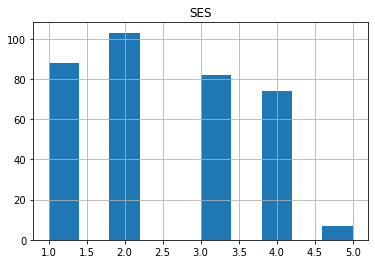

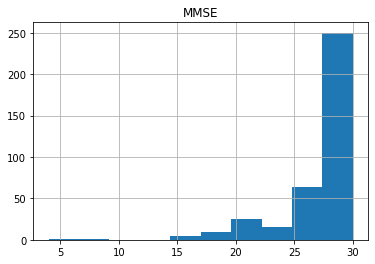

In [12]:
# Great! It seesm that only two columns have null values, 
# Both have <5% of null values. Since we have a relatively small dataset for ML, 
# we'll try to impute the missing data to keep more observation in the analysis. 
# Let's check the distriution for values in SES and MMSE
for c in ['SES', 'MMSE']:
    df[c].hist()
    plt.title(c)
    plt.show()   

In [13]:
# For both SES and MMSE, the distribution is skewed！ We'll impute the null values with their column median.
df['SES'].fillna (df['SES'].median(), inplace = True)
df['MMSE'].fillna (df['MMSE'].median(), inplace = True)

In [14]:
# Let's make sure the dataset doesn't have null values now
df.isnull().sum()

Subject ID    0
MRI ID        0
Group         0
Visit         0
MR Delay      0
M/F           0
Hand          0
Age           0
EDUC          0
SES           0
MMSE          0
CDR           0
eTIV          0
nWBV          0
ASF           0
dtype: int64

### Check the balance of the dataset

In [15]:
# We'll use the column "Group" as the target for ML. 
# Note there are three categories, Demented, Nondemented, and Converted. 
# "Converted" means the patient was previously normal but now is diagnosed with dementia
# Let's change "Converted" in the column "Group" to "Demented"
df['Group'] = df['Group'].replace('Converted','Demented')

Nondemented    190
Demented       183
Name: Group, dtype: int64

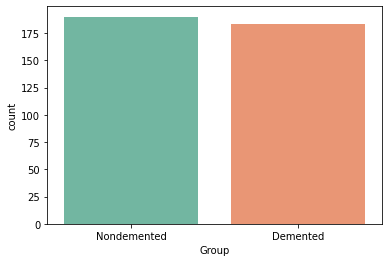

In [16]:
# Now "Group" should have only two categories. Let's check the balance. 
sns.countplot(data=df, x='Group', palette = "Set2")
df['Group'].value_counts()

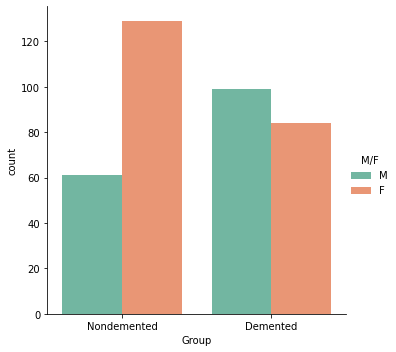

In [17]:
# It's good that both categories have about the same number of patients.
# Let's also check the balance in terms of gender.
sns.catplot(data=df, x='Group',hue='M/F',kind="count", palette = "Set2")

### Dropping Useless Columns

We will choose `Group`(Nondemented or Demented) as the target and use some of others features to predict which group that an individual belongs to. For some columns, it's easy to decide to keep or drop. For example, we can drop `Subject ID` and `MRI ID`, as they are unlikely to be related to an individual's health status. `MR Delay` can also be deleted, as it only indicates the number of days since the previous visit. We can also drop `Hand`, since all the individuals in this dataset are R (right-handed). Additionally, `CDR` is equivalent to `Group` but with more categories (0, 0.5, 1, 2), so `CDR` should not be included in the ML model. For other featrues, we will perform featrue selection later. 

In [18]:
# Let's drop some features that we don't need. 
feature_to_drop = ['Subject ID', 'MRI ID', 'MR Delay', 'CDR', 'Hand']
df = df.drop(feature_to_drop, axis = 1)

In [19]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 373 entries, 0 to 372
Data columns (total 10 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Group   373 non-null    object 
 1   Visit   373 non-null    int64  
 2   M/F     373 non-null    object 
 3   Age     373 non-null    int64  
 4   EDUC    373 non-null    int64  
 5   SES     373 non-null    float64
 6   MMSE    373 non-null    float64
 7   eTIV    373 non-null    int64  
 8   nWBV    373 non-null    float64
 9   ASF     373 non-null    float64
dtypes: float64(4), int64(4), object(2)
memory usage: 29.3+ KB


### Fixing the datatype

In [20]:
# Note the Dtype for 'Group' and M/F' is int64. We can change it to object, 
# but here we'll just binarize the categories with 0/1, so that they are easier to analyze
df['M/F'].replace(['M','F'], [1,0], inplace = True)
df['Group'].replace(['Nondemented', 'Demented'], [0, 1], inplace = True)

# The Dtype of 'SES' and 'MMSE' should be int64. 
df['SES'] = df['SES'].astype(int)
df['MMSE'] = df['MMSE'].astype(int)

In [21]:
# Let's check again to confirm
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 373 entries, 0 to 372
Data columns (total 10 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Group   373 non-null    int64  
 1   Visit   373 non-null    int64  
 2   M/F     373 non-null    int64  
 3   Age     373 non-null    int64  
 4   EDUC    373 non-null    int64  
 5   SES     373 non-null    int64  
 6   MMSE    373 non-null    int64  
 7   eTIV    373 non-null    int64  
 8   nWBV    373 non-null    float64
 9   ASF     373 non-null    float64
dtypes: float64(2), int64(8)
memory usage: 29.3 KB


**To summarize:**
- No duplicated values were found in this dataset. 
- Two columns (SES and MMSE) were identified to have null values. Since the amount of missing values <5%, and because we want to keep more data for future analysis, data imputation was performed. Both SES and MMSE show skewed distribution, so median values were used for imputation.
- The 'Group' column is balanced, as the two categories have about the same amount of patients. However, the sex ratio is skewed in the Nondemented group. It's difficulat to dertermine whether it would cause any significant issue, but we'd better keep it in mind. 
- Some useless features were dropped from the dataset, 'Subject ID', 'MRI ID', 'MR Delay', 'CDR', and 'Hand'. 
- The Data type for some features were fixed. 

## 4. Exploratory Data Analysis

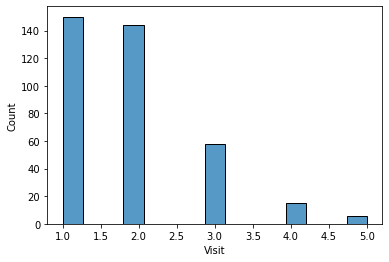

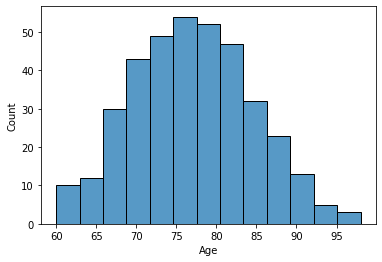

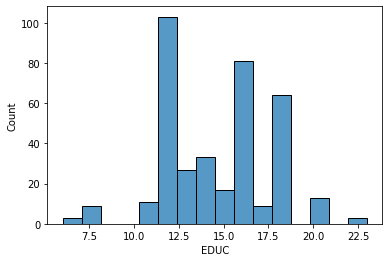

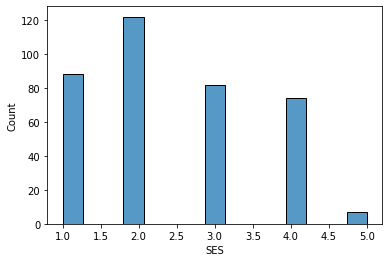

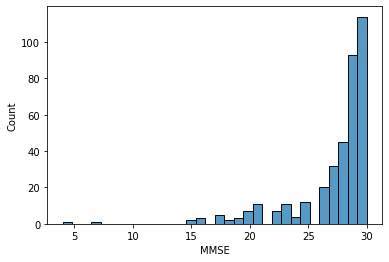

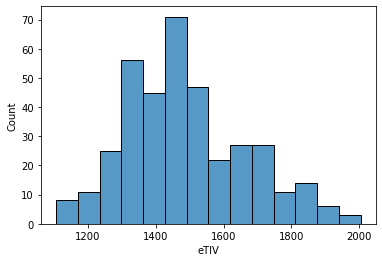

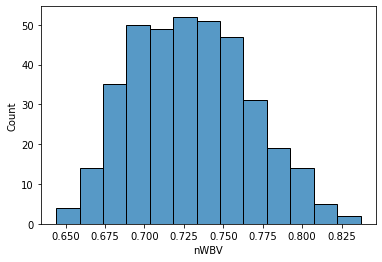

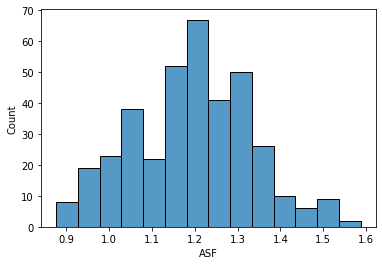

In [22]:
# First, let's quickly look at the data distribution in each columns. 
for c in ['Visit','Age', 'EDUC', 'SES', 'MMSE', 'eTIV', 'nWBV', 'ASF']:
    sns.histplot(data=df, x=str(c))
    plt.show()

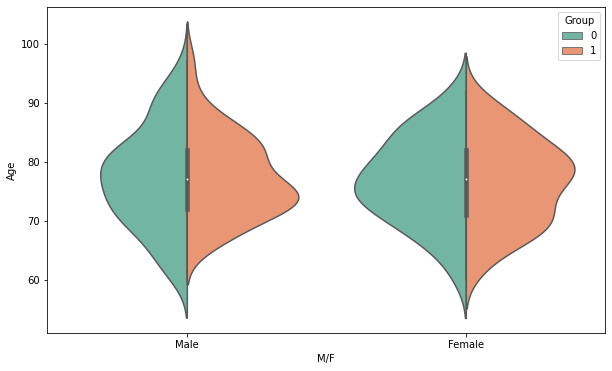

In [23]:
# Let's see if male and female patients are different in disease onset.
# 0 = Normal and 1 = dementia
plt.figure(figsize=(10, 6))
ax = sns.violinplot(data=df, x="M/F", y="Age",hue="Group",split=True,palette = "Set2")
ax.set_xticklabels(['Male', 'Female'])
plt.show()

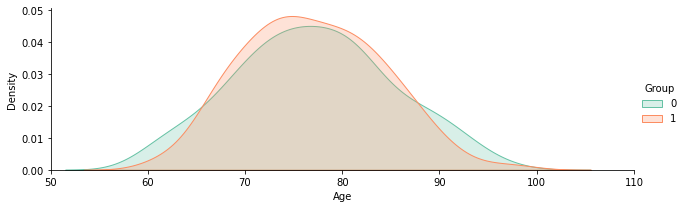

In [24]:
# Let's see the age distribution in the Normal(0) and Dementia (1) groups
facet= sns.FacetGrid(df,hue="Group", aspect=3, palette = "Set2")
facet.map(sns.kdeplot,'Age',shade= True)
facet.set(xlim=(50, 110))
facet.add_legend()

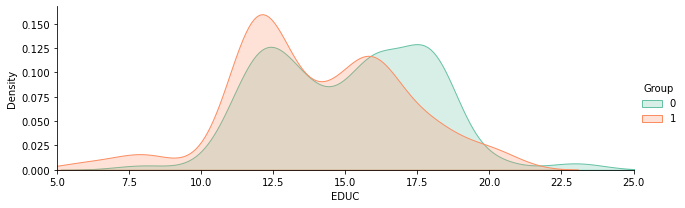

In [25]:
# Let's see the education distribution in the Normal(0) and Dementia (1) groups
facet= sns.FacetGrid(df,hue="Group", aspect=3, palette = "Set2")
facet.map(sns.kdeplot,'EDUC',shade= True)
facet.set(xlim=(5,25))
facet.add_legend()

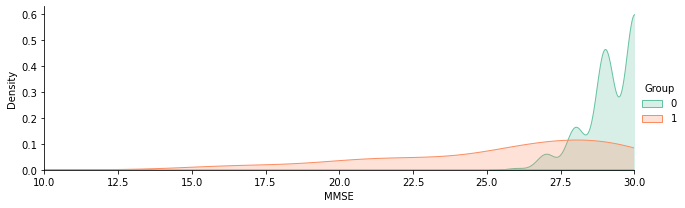

In [26]:
# Let's see the Mini Mental State Examination distribution in the Normal(0) and Dementia (1) groups
facet= sns.FacetGrid(df,hue="Group", aspect=3, palette = "Set2")
facet.map(sns.kdeplot,'MMSE',shade= True)
facet.set(xlim=(10, df['MMSE'].max()))
facet.add_legend()

### Correlation matrix

In [27]:
# To inspect the relationships between featrues, let's get the correlation matrix
df.corr()

,Group,Visit,M/F,Age,EDUC,SES,MMSE,eTIV,nWBV,ASF
Group,1.000000,-0.095507,0.222146,-0.005941,-0.193060,0.038870,-0.520553,-0.042700,-0.311346,0.032495
Visit,-0.095507,1.000000,0.069791,0.183213,0.024615,-0.049294,-0.027381,0.117428,-0.126682,-0.120399
M/F,0.222146,0.069791,1.000000,-0.037726,0.089279,-0.048504,-0.168530,0.572549,-0.249618,-0.561647
Age,-0.005941,0.183213,-0.037726,1.000000,-0.027886,-0.045410,0.055255,0.042348,-0.518359,-0.035067
EDUC,-0.193060,0.024615,0.089279,-0.027886,1.000000,-0.691222,0.192158,0.257015,-0.012200,-0.241752
SES,0.038870,-0.049294,-0.048504,-0.045410,-0.691222,1.000000,-0.139943,-0.249030,0.092361,0.240831
MMSE,-0.520553,-0.027381,-0.168530,0.055255,0.192158,-0.139943,1.000000,-0.036234,0.342189,0.044960
eTIV,-0.042700,0.117428,0.572549,0.042348,0.257015,-0.249030,-0.036234,1.000000,-0.210122,-0.988877
nWBV,-0.311346,-0.126682,-0.249618,-0.518359,-0.012200,0.092361,0.342189,-0.210122,1.000000,0.213476
ASF,0.032495,-0.120399,-0.561647,-0.035067,-0.241752,0.240831,0.044960,-0.988877,0.213476,1.000000


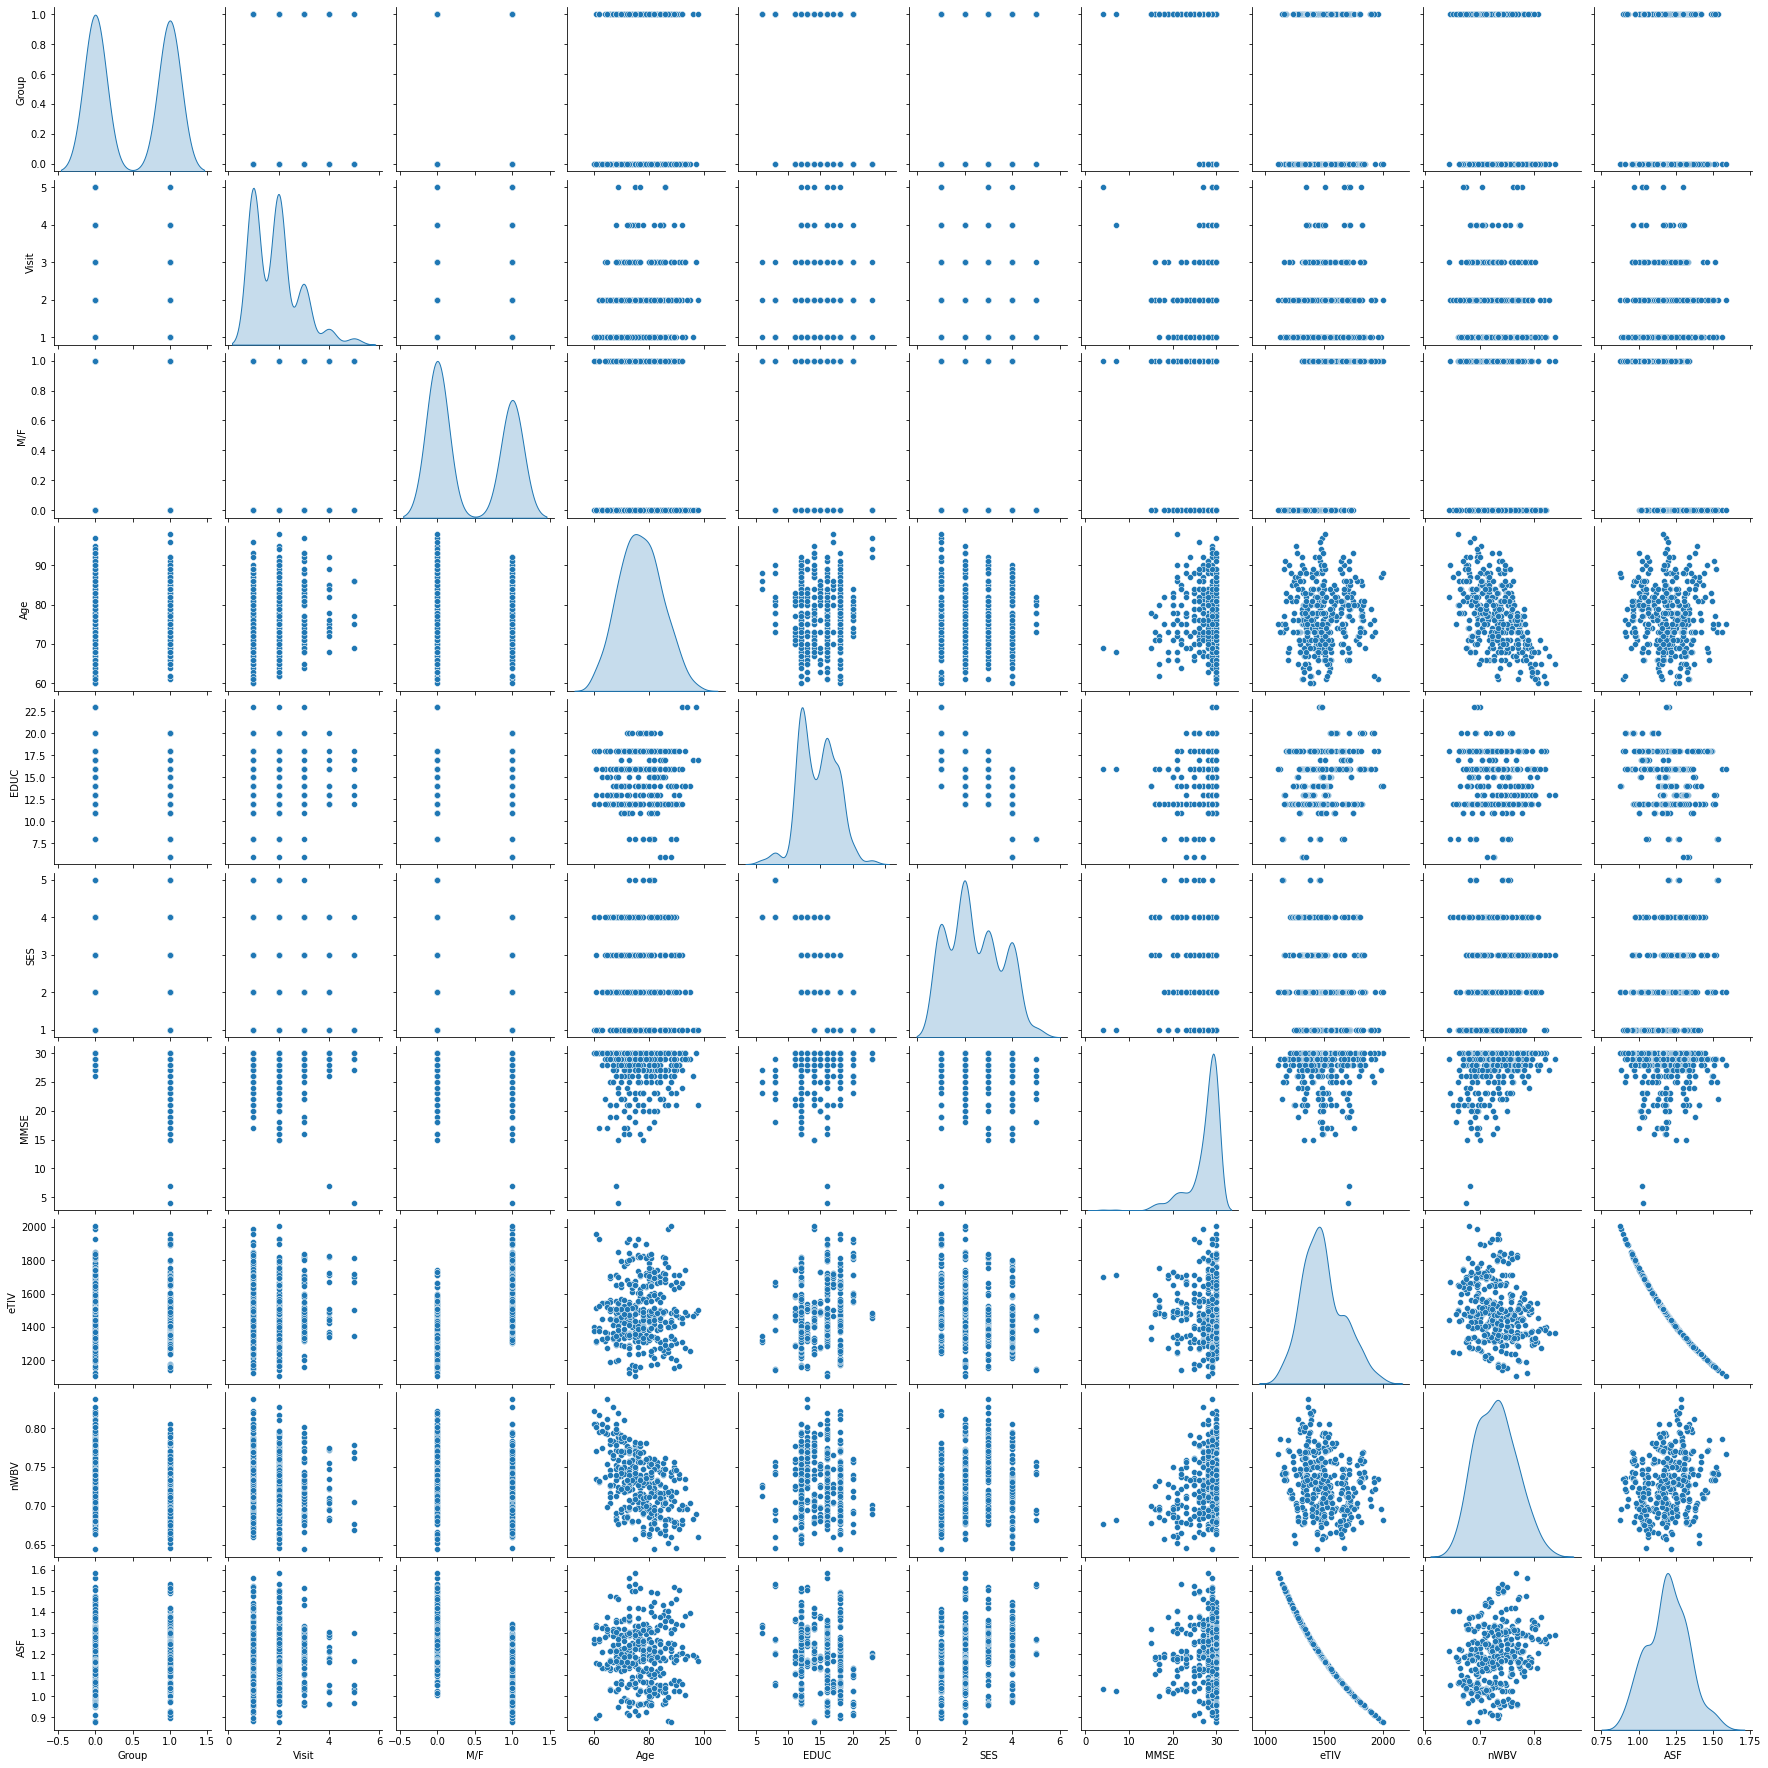

In [28]:
# Let's also plot a pairplot 
sns.pairplot(df,diag_kind='kde')
plt.show()

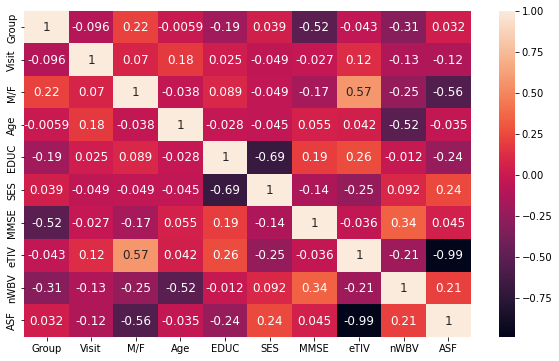

In [29]:
# visulazing correlation matrix using a heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(df.corr(), annot = True, annot_kws = {'fontsize': 12})
plt.show()

**Some observations from EDA:**
- Alzheimer's disease primarily affects older people. Many individuals in this cohort are in the 75+/-10y range. 
- Many individuals have only visited the memory clinic 3 times or less, suggesting that dementia just begun to manifest. Most of them still have good cognitive status (high MMSE score). All of these make the dataset ideal for our goal of making an accurate diagnoses in the early stage of the disease. 
- Many male patients are diagnosed in the age of ~ 80 years while female patients develop dementia a few years earlier.
- According to the correlation matrix, some features are highly correlated, for example, eTIV and ASF. We'll perform some feature selection in the next section. 

## 5. Machine learning models

### Data preparation for ML models

In [30]:
# 'Group' is the target y. Other columns will be features X. 
y = df['Group'].values
X = df.loc[:, df.columns !='Group'].values

# Because different features have different range of data, let's normalize the data
X=StandardScaler().fit_transform(X)

In [31]:
# Split the datset into train and test datasets, such that the test dataset is 30% of original data.
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 22, test_size = 0.3)

### Feature Selection
'Group' is the target and we have dropped a few features by judgment in the previous steps. Too many features can lead to overfitting because it may increase model complexity. For other features, we'll use **L1 regulation** to select the important ones.

In [32]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 373 entries, 0 to 372
Data columns (total 10 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Group   373 non-null    int64  
 1   Visit   373 non-null    int64  
 2   M/F     373 non-null    int64  
 3   Age     373 non-null    int64  
 4   EDUC    373 non-null    int64  
 5   SES     373 non-null    int64  
 6   MMSE    373 non-null    int64  
 7   eTIV    373 non-null    int64  
 8   nWBV    373 non-null    float64
 9   ASF     373 non-null    float64
dtypes: float64(2), int64(8)
memory usage: 29.3 KB


In [33]:
# Initialize an SGD logistic regression model with L1 regulation and train the model. 
SGD_model = SGDClassifier(loss='log_loss', penalty=None, fit_intercept=True, 
                       max_iter=100, learning_rate='constant', eta0=0.01)
SGD_model.fit(X_train, y_train)

SGDClassifier(eta0=0.01, learning_rate='constant', loss='log_loss',
              max_iter=100, penalty=None)

In [34]:
# We could get the absolute coefficient values for each feature
coef = np.abs(SGD_model.coef_)
coef

array([[0.07945839, 0.6257857 , 0.5879154 , 0.73643964, 0.7243445 ,
        2.45087618, 0.51370094, 0.73797895, 0.20985586]])

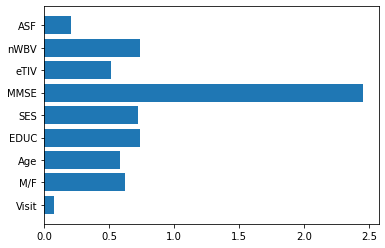

In [35]:
# Let's plot the importance of each featrues
feature = ['Visit','M/F', 'Age', 'EDUC', 'SES', 'MMSE', 'eTIV', 'nWBV', 'ASF']
plt.barh(feature, coef[0])
plt.show()

In [36]:
# We can see that `Visit` and `ASF` have much smaller coefficient values, suggesting they are weak features! 
# To have a simple model, we'll drop the two features. 
df = df.drop(['Visit', 'ASF'], axis = 1)

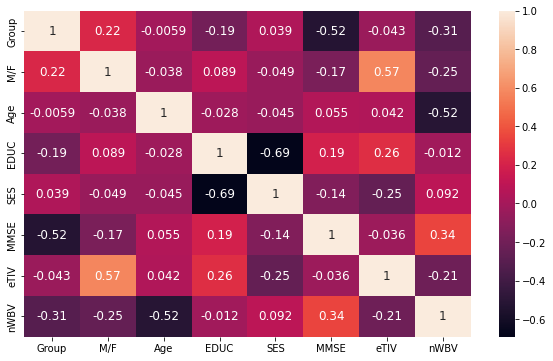

In [37]:
# As mentioned earlier, 'ASF' is negatively correlated with'eTIV' (correlation coefficients = -0.99), 
# which will hurt the intepretability of the model.
# Therefore, removing 'ASF' will also help reduce collinearity.
# Based on the heatmap below, it indeed looks better now. 
plt.figure(figsize=(10, 6))
sns.heatmap(df.corr(), annot = True, annot_kws = {'fontsize': 12})
plt.show()

### ML model： Logistic Regression

In [38]:
# Let's build the first ML model - Logistic Regression model
LR_model =LogisticRegression(C=0.1).fit(X_train, y_train)
# Checking the accuracy score
LR_acuracy=LR_model.score(X_test, y_test).round(3)
print('The accuracy score:', LR_acuracy)

The accuracy score: 0.812


**Logistic Regression: hyperparameter tuning by cross validation**

In [39]:
# Let's see if we could improve the accruacy by finding a better C
LR_model =LogisticRegression()
C = [0.001, 0.01, 0.1, 1, 10, 100, 1000] # for GridSearchCV 
grid_LR = {'C':C}
LR_grid = GridSearchCV(LR_model, param_grid=grid_LR, scoring='accuracy') #  run the grid search with cross validation
LR_grid.fit(X_train, y_train)
LR_grid.best_params_ # the best C parameter

{'C': 1}

In [40]:
# Let's build the LR model again with the best C parameter.
# The acuracy score should be higher. We'll also check other evaluation metrics.
LR_MODEL =LogisticRegression(C=1).fit(X_train, y_train)
LR_highest_accuracy = LR_MODEL.score(X_test, y_test).round(3)
print('The highest accuracy score based on the "best" C:', LR_highest_accuracy)
LR_prediction = LR_MODEL.predict(X_test)
recall = recall_score(y_test, LR_prediction).round(3)
print('The highest recall score based on the "best" C:', recall)
LR_precision = precision_score(y_test, LR_prediction).round(3)
print('The highest precision score based on the "best" C:', LR_precision)
LR_fpr, LR_tpr, thresholds = roc_curve(y_test, LR_prediction)
LR_AUC = auc(LR_fpr, LR_tpr).round(3)
print('The highest AUC score based on the "best" C:', LR_AUC)
LR_F1_score = f1_score(y_test, LR_prediction).round(3)
print('The highest F1 score based on the "best" C:', LR_F1_score)

The highest accuracy score based on the "best" C: 0.839
The highest recall score based on the "best" C: 0.717
The highest precision score based on the "best" C: 0.977
The highest AUC score based on the "best" C: 0.849
The highest F1 score based on the "best" C: 0.827


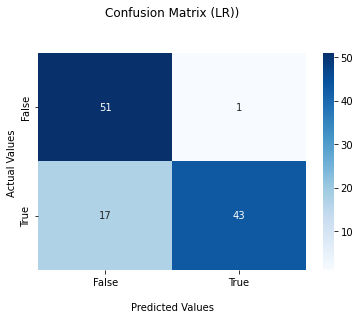

In [41]:
# Let's plot the Confusion Matrix for the LR model
LR_matrix = confusion_matrix(y_test, LR_prediction)
ax = sns.heatmap(LR_matrix, annot=True, cmap='Blues')
ax.set_title('Confusion Matrix (LR))\n\n')
ax.set_xlabel('\nPredicted Values')
ax.set_ylabel('Actual Values ')
ax.xaxis.set_ticklabels(['False','True'])
ax.yaxis.set_ticklabels(['False','True'])
plt.show()

### ML model： Gaussian Naive Bayes

In [42]:
# Let's build a Gaussian Naive Bayes model
GNB_model = GaussianNB(var_smoothing = 1e-9).fit(X_train, y_train) # the default 'var_smoothing' = 1e-9
# Checking the accuracy score
GNB_acuracy = GNB_model.score(X_test, y_test).round(3)
print('The accuracy score:', GNB_acuracy)

The accuracy score: 0.795


**Gaussian Naive Baye: hyperparameter tuning by cross validation**

In [43]:
# Let's see if we could improve the accruacy by finding a better 'var_smoothing'
GNB_model = GaussianNB()
grid_NB = {
    'var_smoothing': [1e-4, 1e-5, 1e-6, 1e-7, 1e-8, 1e-9, 1e-10, 1e-11, 1e-12, 1e-13, 1e-14]
}
NB_clf = GridSearchCV(GNB_model, param_grid=grid_NB, cv=10)
NB_clf.fit(X_train, y_train)
NB_clf.best_params_

{'var_smoothing': 0.0001}

In [44]:
# Let's build the NB model again with the best 'var_smoothing' parameter.
# The acuracy score should be higher. We'll also check other evaluation metrics.
NB_MODEL = GaussianNB(var_smoothing=0.0001).fit(X_train, y_train)
NB_highest_accuracy = NB_MODEL.score(X_test, y_test).round(3)
print('The highest accuracy score based on the "best" var_smoothing:', NB_highest_accuracy)
NB_prediction = NB_MODEL.predict(X_test)
NB_recall = recall_score(y_test, NB_prediction).round(3)
print('The highest recall score based on the "best" var_smoothing:', NB_recall)
NB_precision = precision_score(y_test, NB_prediction).round(3)
print('The highest precision score based on the "best" var_smoothing:', NB_precision)
NB_fpr, NB_tpr, thresholds = roc_curve(y_test, NB_prediction)
NB_AUC = auc(NB_fpr, NB_tpr).round(3)
print('The highest AUC score based on the "best" var_smoothing:', NB_AUC)
NB_F1_score = f1_score(y_test, NB_prediction).round(3)
print('The highest F1 score based on the "best" var_smoothing:', NB_F1_score)

The highest accuracy score based on the "best" var_smoothing: 0.795
The highest recall score based on the "best" var_smoothing: 0.633
The highest precision score based on the "best" var_smoothing: 0.974
The highest AUC score based on the "best" var_smoothing: 0.807
The highest F1 score based on the "best" var_smoothing: 0.768


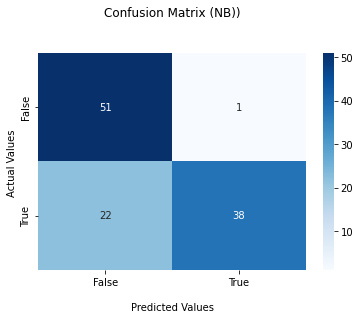

In [45]:
# Let's plot the Confusion Matrix for the NB model
NB_matrix = confusion_matrix(y_test, NB_prediction)
ax = sns.heatmap(NB_matrix, annot=True, cmap='Blues')
ax.set_title('Confusion Matrix (NB))\n\n')
ax.set_xlabel('\nPredicted Values')
ax.set_ylabel('Actual Values ')
ax.xaxis.set_ticklabels(['False','True'])
ax.yaxis.set_ticklabels(['False','True'])
plt.show()

### ML model： Support Vector Machine

In [46]:
# Next let't try Support Vector Machine model
# The default parameter values for SVM: C=1, gamma='scale', kernel='rbf'
SVC_model = SVC(C=1, gamma='scale', kernel='rbf').fit(X_train, y_train)
# Checking the accuracy score
SVC_acuracy = SVC_model.score(X_test, y_test).round(3)
print('The accuracy score:', SVC_acuracy)

The accuracy score: 0.848


**Support Vector Machine: hyperparameter tuning by cross validation**

In [47]:
# Let's see if we could improve the accruacy by finding the 'best' combination
SVC_model = SVC(C=1, gamma='scale', kernel='rbf').fit(X_train, y_train)
SVC_grid = [
    {'C': [0.0001, 0.001, 0.01, 0.1, 1, 2, 3, 4, 5, 6, 7, 8, 9],
    'gamma': ['scale', 100, 10, 1, 0.1, 0.01, 0.001, 0.0001, 0.00001],
    'kernel': ['rbf', 'linear', 'poly', 'sigmoid']},
]

optimal_params = GridSearchCV(SVC_model,
                             param_grid = SVC_grid,
                             scoring='accuracy',
                             refit=True, 
                             n_jobs=-1,
                             cv=5)

optimal_params.fit(X_train, y_train)
print('The best combination:', optimal_params.best_params_)

The best combination: {'C': 2, 'gamma': 1, 'kernel': 'rbf'}


In [49]:
# Let's build the SVC model again with the 'best' combination of parameters.
# The acuracy score should be higher. We'll also check other evaluation metrics.
SVC_MODEL = SVC(C=1, gamma= 1, kernel="rbf").fit(X_train, y_train)            
SVC_highest_accuracy = SVC_MODEL.score(X_test, y_test).round(3)
print('The highest accuracy score based on the "best" parameter combination:', SVC_highest_accuracy)
SVC_prediction = SVC_MODEL.predict(X_test)
SVC_recall = recall_score(y_test, SVC_prediction).round(3)
print('The highest recall score based on the "best" parameter combination:', SVC_recall)
SVC_precision = precision_score(y_test, SVC_prediction).round(3)
print('The highest precision score based on the "best" parameter combination:', SVC_precision)
SVC_fpr, SVC_tpr, thresholds = roc_curve(y_test, SVC_prediction)
SVC_AUC = auc(SVC_fpr, SVC_tpr).round(3)
print('The highest AUC score based on the "best" parameter combination:', SVC_AUC)
SVC_F1_score = f1_score(y_test, SVC_prediction).round(3)
print('The highest F1 score based on the "best" parameter combination:', SVC_F1_score)

The highest accuracy score based on the "best" parameter combination: 0.857
The highest recall score based on the "best" parameter combination: 0.85
The highest precision score based on the "best" parameter combination: 0.879
The highest AUC score based on the "best" parameter combination: 0.858
The highest F1 score based on the "best" parameter combination: 0.864


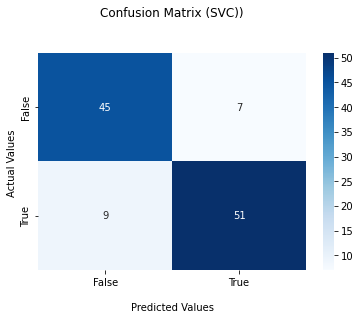

In [50]:
# Let's plot the Confusion Matrix for the SVC model
SVC_matrix = confusion_matrix(y_test, SVC_prediction)
ax = sns.heatmap(SVC_matrix, annot=True, cmap='Blues')
ax.set_title('Confusion Matrix (SVC))\n\n')
ax.set_xlabel('\nPredicted Values')
ax.set_ylabel('Actual Values ')
ax.xaxis.set_ticklabels(['False','True'])
ax.yaxis.set_ticklabels(['False','True'])
plt.show()

## 6. Summary of results and analysis

- We have developed three different models, Logistic Regression (LR), Gaussian Naive Bayes (GNB), and Support Vector Machine (SVM). For each model, we performed hyperparameter tuning to find the optimal parameters based on the accuracy score (see details in the ML model session). 
- Since the dataset has some imbalance issues, for each model we also measured other metrics such as recall, precision, AUC, and F1 score, besides accuracy (see the table below). Overall, the scores are not bad! Interestingly, recall is the lowest among all the metrics across different models. It emphasizes the importance of measuring multiple metrics. We would overate the performance of the models if the recall score was not included in the analysis. 
- In the plot below we compared the AUC between models. We can see that GNB is the worst, and SVM is a little better than LR. In terms of the recall score (see the table below), SVM is higher than LR, while LR is better if we consider the precision score. Which one is more important? Since we want to detect dementia at its early stage, recall is more important because overlooked cases (i.e., false negatives) are more costly than false alarms (i.e., false positives). Therefore, we could conclude that for the current dataset SVM performs better compared to the other two models in detecting dementia. 

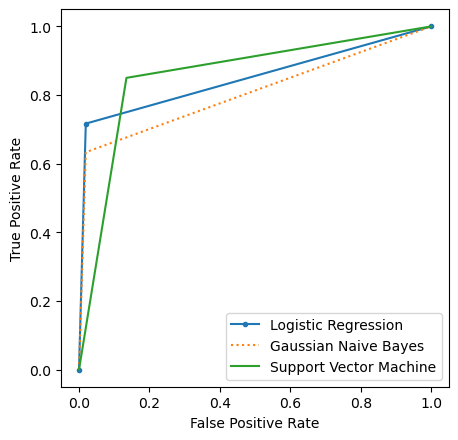

In [51]:
# To evaluate the three models, let's plot ROC and compare AUC
plt.figure(figsize=(5, 5), dpi=100)
plt.plot(LR_fpr, LR_tpr, marker='.', label='Logistic Regression')
plt.plot(NB_fpr, NB_tpr, linestyle=':', label='Gaussian Naive Bayes')
plt.plot(SVC_fpr, SVC_tpr, linestyle='-', label='Support Vector Machine')

plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')

plt.legend()

plt.show()

In [52]:
# Let'summarize the evaluation matrics for each model in a table. 
evalu_metrics = {'Model': ['Logistic Regression', 'Gaussian Naive Bayes', 'Support Vector Machine'],
       'Accuracy': [0.839, 0.795, 0.857],
       'Recall': [0.717, 0.633, 0.850],
       'Precision': [0.977, 0.974, 0.879],
       'AUC': [0.849, 0.807, 0.858],
       'F1 score': [0.827, 0.768, 0.864]}
table = pd.DataFrame(evalu_metrics, columns=['Model', 'Accuracy', 'Recall', 'Precision', 'AUC', 'F1 score'])
table

,Model,Accuracy,Recall,Precision,AUC,F1 score
0,Logistic Regression,0.839,0.717,0.977,0.849,0.827
1,Gaussian Naive Bayes,0.795,0.633,0.974,0.807,0.768
2,Support Vector Machine,0.857,0.850,0.879,0.858,0.864


## 7. Discussion and Conclusion

1. In this work three different machine learning models (Logistic Regression, Gaussian Naive Bayes, and Support Vector Machine) were developed to predict whether an individual has Alzheimer's-related dementia or not. I've definitely learned a lot during this process:
 * Data cleaning and preparation is the all-important first step to successful data science. 
 * Alzheimer's disease, like many other disorders, is indeed complicated and it can present with a variety of symptoms,  worsen at different rates, and have many underlying genetic and environmental causes, some of which are unknown. The aim of this study is to help with early disease detection, making the task even more challenging. 
 * It is critical to consider multiple metrics to evaluate a model. Issues such as an imbalance in the dataset may lead to misleading results if only one metric is used. 
2. As summarized in the previous section, the performance metrics of these models are not very high. It might be because the dataset is relatively small. Additionally, other features related to the disease might be considered. For all three models, the recall score is the lowest compared with other metrics, suggesting an imbalance in the dataset. As mentioned in the Data Cleaning session, the M/F ratio in the normal group is 1:2, which may influence the performance of machine learning models. 
3. To address these issues, we may include more data to make the current dataset bigger. Actually, more data has been generated from the OASIS project. For example, the most recent one, OASIS-4 consists of a collection of 663 subjects, and more features have been measured including clinical, csf, neurospychometric, and neuroimaging assessments. Regarding the imbalance issue, oversampling could be used for this small dataset, such as repetition, bootstrapping, or SMOTE (Synthetic Minority Over-Sampling Technique). 

## 8. Reference
1. https://www.alz.org/alzheimer_s_dementia
2. https://www.oasis-brains.org/#data
3. https://cead.cumc.columbia.edu/content/what-alzheimers-disease
4. https://www.frontiersin.org/articles/10.3389/fpubh.2022.853294/full
5. J. Pers. Med. 2021, 11(9), 902; https://doi.org/10.3390/jpm11090902


The notebook has been uploaded to Github
https://github.com/Benjamin2009/ML-model-for-AD